# 1. Load the .py file using %load "cwd\\check_fabian.py (Check Predictions).py"
** CWD is your current working directory, specify the full path

# 2. Import neccesities and load model
There are two types of models:

Linear - mypilot91.h5

Categorical - mypilot98.h5 & SavedModel.hdf5
# 3. Create 3 lists, we will append filename, angle & throttle to them respectively
# 4. Specify number of files in range, e.g 1 to 3000
# 5. Specify the full path for 'filename' and 'filename1' 
# The models should follow the tub they were trained on:
mypilot91 (Linear) & SavedModel6 (Categorical) - tub_280_20-02-01

mypilot98 (Categorical) - pilottub98

You can increase the number of files to display, range(start,stop) depending on the tub & amount of data it has



# 6. **IMPORTANT**
# **If using linear model, comment away the Categorical code, vice versa if using categorical model


# 7. Run the code

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571428, 0.1428571428571428, 0.1428571428571428]


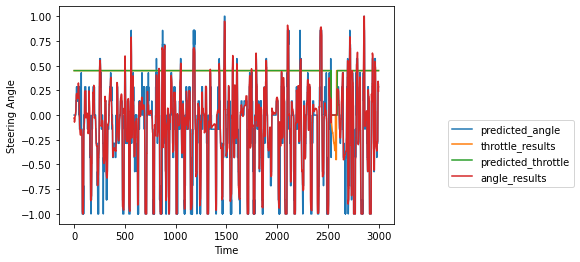

'\n# Test Example\nimg = image.imread(\'C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\1_cam-image_array_.jpg\')\nprint(img.shape)\nplt.imshow(img)\nplt.show()\nimg_test = img.reshape(-1,120, 160, 3)\nprediction = model.predict(img_test)\nprint(prediction, "\n")\n\nj=0\nimport glob\nimage_list = []\nfor filename in glob.glob(\'./data/j*.jpg\'):\n    im=image.imread(filename)\n    print(filename)\n    image_list.append(im)\nprint(j)\n'

In [19]:
# %load "C:\\Users\\kansh\\projects\\mycar\\check_fabian.py (Check Predictions).py"

from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy 
import numpy as np
import json
from matplotlib import image
import matplotlib.pyplot as plt

# Load the trained model 
#model = load_model('C:\\Users\\kansh\\projects\\mycar\\models\\mypilot91.h5', compile = False) #linear pilot91
#model = load_model('C:\\Users\\kansh\\projects\\mycar\\models\\mypilot98.h5', compile = False) #categorical pilot98 NO early stop
model = load_model('C:\\Users\\kansh\\Desktop\\Entire FYP Folder\\FYP Notebooks (Workstation)\\SavedModel6.hdf5', compile = False)  #categorical Own

image_list=[]
angle_results=[]
throttle_results=[]
for i in range(1,3000):  # Number of files to display  
    j=str(i)
    
    filename='C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\'+j+'_cam-image_array_.jpg' #linear + own
    #filename='C:\\Users\\kansh\\projects\\mycar\\data\\pilottub98\\'+j+'_cam-image_array_.jpg'    #categorical
    #print(filename)
    
    im=image.imread(filename)
    image_list.append(im)
    
    filename1='C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\record_'+j+'.json' #linear + own
    #filename1='C:\\Users\\kansh\\projects\\mycar\\data\\pilottub98\\record_'+j+'.json'    #categorical

    with open(filename1, 'r') as f:
        data = json.load(f)
        x = data['user/angle']
        y = data['user/throttle']
        angle_results.append(data['user/angle'])
        throttle_results.append(data['user/throttle'])

# Get predictions 
#print(type(image_list))
image_array=numpy.array(image_list)
prediction = model.predict(image_array)

############################################################################################
"""
# **Use for linear**
#print(type(prediction))
print(prediction)         # There are two columns for angle and throttle
predicted_angle = prediction[0]
predicted_throttle = prediction[1]
# **Use for linear**
"""
############################################################################################

# **Use for categorical**
# Function from utils.py (projects/donkeycar/donkeycar/utils.py (Binned & Unbinned))
def linear_unbin(arr, N=15, offset=-1, R=2.0):   # preform inverse linear_bin,
    b = np.argmax(arr)                           # taking one hot encoded arr, get max value
    a = b *(R/(N + offset)) + offset             # rescale given R range and offset
    return a

# Create empty list to get
# for x amount in prediction[0], append to (function to reverse 1 hot encode) to angles, put in list
predicted_angle = []
predicted_throttle = []
for i in prediction[0]: 
    predicted_angle.append(linear_unbin(i))
for i in prediction[1]:
    predicted_throttle.append(linear_unbin(i, N=20,offset=0,R=0.5))
# **Use for categorical**

############################################################################################

# Plot graph of prediction, angle & throttle value
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_angle,    label='predicted_angle') 
plt.plot(throttle_results,   label='throttle_results')
plt.plot(predicted_throttle, label='predicted_throttle') 
plt.plot(angle_results,      label='angle_results')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

"""
# Test Example
img = image.imread('C:\\Users\\kansh\\projects\\mycar\\data\\tub_280_20-02-01\\1_cam-image_array_.jpg')
print(img.shape)
plt.imshow(img)
plt.show()
img_test = img.reshape(-1,120, 160, 3)
prediction = model.predict(img_test)
print(prediction, "\n")

j=0
import glob
image_list = []
for filename in glob.glob('./data/j*.jpg'):
    im=image.imread(filename)
    print(filename)
    image_list.append(im)
print(j)
"""

# 8. Now that you have all plots together above, run the code below

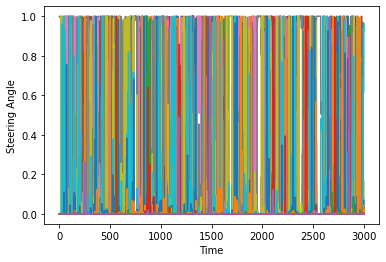

[array([[1.03775037e-26, 4.73651365e-25, 6.61070763e-25, ...,
        4.93761498e-16, 4.29479202e-21, 7.07720053e-25],
       [9.09541987e-27, 3.15683892e-25, 5.59236315e-25, ...,
        5.81245814e-16, 7.86482115e-21, 2.40358641e-24],
       [8.50287408e-26, 3.32278508e-24, 4.08425910e-24, ...,
        8.79236081e-16, 1.11299599e-20, 3.76441939e-24],
       ...,
       [2.67744653e-08, 2.37176945e-08, 6.75325680e-08, ...,
        1.59920659e-04, 2.57990463e-03, 4.52940839e-07],
       [1.25128474e-09, 7.17787996e-10, 4.49034898e-09, ...,
        9.69242683e-06, 1.42425433e-05, 3.66206487e-09],
       [2.60107463e-05, 1.09691723e-06, 1.11739255e-05, ...,
        1.89947037e-04, 2.54473626e-03, 8.59157262e-06]], dtype=float32), array([[1.8958071e-15, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.5849423e-15, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.6971273e-15, 0.0000000e+00, 

In [28]:
"""
# Keras Categorical
# Directly plotting prediction[0] gives us 0 (angle) and 1 (throttle)
plt.plot(prediction[0]) # Since it only predict 0.0 and 1.0, it's in binary.
plt.show()
# Since we are using categorical, there must be 1 hot encoding
print(prediction[0][2:10])
"""

#################################################################################
# Own Model Categorical
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(prediction[0]) # 0 for angle, 1 for throttle
plt.show()
# Since we are using categorical, there must be 1 hot encoding
print(prediction[0:5])


# 9. These lines of colours on the graph and numpy array 0's and 1's are in 1 Hot Encoding format (Commonly used for categorical data)
The predictions for every category of steering angle are 1 Hot Encoded

When we plot the prediction[0] for predicted angles, it is hardly understood. However, if we print out prediction[0], we can understand better. 

One hot encoding is when a label is assigned to a 2D numpy array of 0s and 1s

For example, I have 3 classes, cat, dog and car I can one hot encode them like this:

Cat = [1,0,0]

Dog = [1,0,1]

Car = [1,1,1]

# 10. Since the angles and throttle have been encoded with linear bin, we decode them using linear_unbin

If you "print(b)" inside the function, you will see a long column of numbers from 0 to 14 which are the categories.

# 11. We create new lists and append our prediction[0] and [1] into the list respectively to decode the data
# 12. Now when we print the predicted_angle/throttle, we can see an array of values

In [36]:
print("Angle values:", predicted_angle[10:20], "\n")
print("Throttle values:", predicted_throttle[10:20])

Angle values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571428, 0.1428571428571428, 0.1428571428571428] 

Throttle values: [0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45]


# 13. We can plot the angle and predicted angle to see if the prediction matches the actual angle

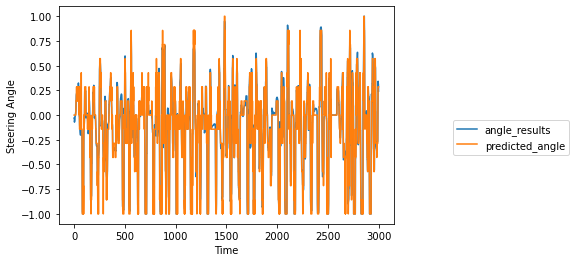

In [22]:
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(angle_results, label='angle_results')
plt.plot(predicted_angle, label='predicted_angle')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

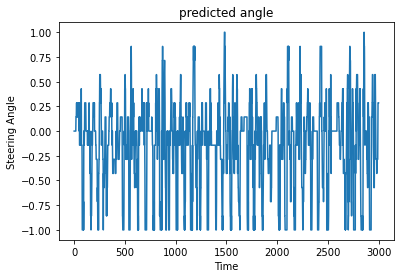

In [23]:
plt.title("predicted angle")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_angle)
plt.show()

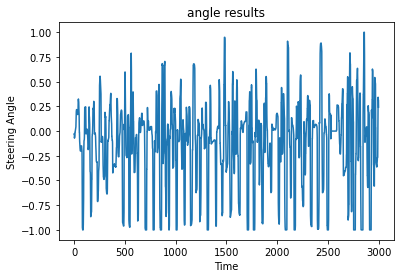

In [24]:
plt.title("angle results")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(angle_results)
plt.show()

# 14. We can also plot the throttle and predicted throttle to see if the prediction matches the actual throttle

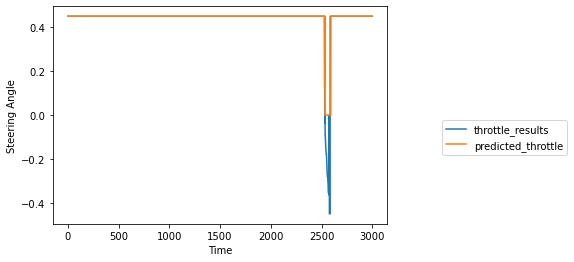

In [25]:
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(throttle_results, label='throttle_results')
plt.plot(predicted_throttle, label='predicted_throttle')
plt.legend(loc='upper center', bbox_to_anchor=(1.35, 0.5))
plt.show()

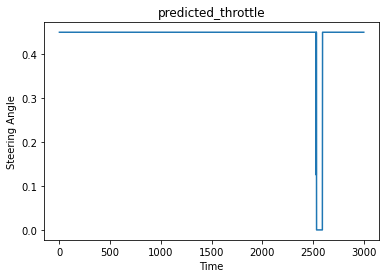

In [26]:
plt.title("predicted_throttle")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(predicted_throttle, label='predicted_throttle')
plt.show()

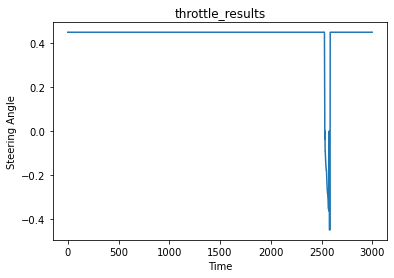

In [27]:
plt.title("throttle_results")
plt.xlabel("Time")
plt.ylabel("Steering Angle")
plt.plot(throttle_results, label='throttle_results')
plt.show()